#Video Game Market Analysis

Athena Softworks, Inc. is a video game developer and publisher.  They specialize in premium role playing games (RPGs) for PC play.  It is early 2020 and Athena is considering acquiring a new game title and there are
three candidate games- Warrior Guild, Seraph Guardians and Evercrest. We have to determine the right game, price and positioning for Athena.

## Loading Dataset

In [51]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('/content/Athena_survey_data.csv')

# Displaying the first few rows of the dataset
print(data.head())

# Displaying the summary of the dataset to understand its structure
print(data.info())


   gender state  age  income  imp.challenge  imp.unlocks  imp.customize  \
0    male    IN   19   20000              4            7              5   
1    male    OR   29   80000              5            7              1   
2    male    MN   52   91000              4            3              3   
3  female    FL   20   24000              7            3              3   
4  female    NM   33   64000              7            6              1   

   imp.difficulty  imp.characters  imp.storyline  ...  rank.Marksman  \
0               7               5              3  ...              1   
1               4               2              4  ...              2   
2               4               5              7  ...              6   
3               6               5              4  ...              5   
4               7               1              2  ...              1   

   rank.QuestoftheTitan  Unnamed: 52  Unnamed: 53  Unnamed: 54  Unnamed: 55  \
0                     5          NaN 

## Factor Analysis

In [52]:
# Installing Factor Analyzer
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Selecting the relevant Likert scale columns for the KMO test
likert_columns = data.columns[4:44]
likert_data = data[likert_columns]

# Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(likert_data)
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO Test
kmo_all, kmo_model = calculate_kmo(likert_data)
print(f"KMO-test overall MSA: {kmo_model}")


Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8903064302758804


The results show that p-value is statistically significant and KMO value is close to 1. This suggests that the relationships between items can likely be well-explained by a smaller number of underlying factors.

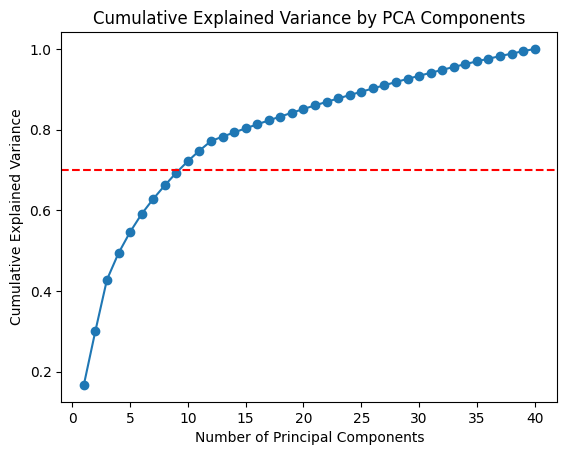

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizing the features (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 4:44])  # adjust the column selection based on actual data

# Fitting the PCA model
pca = PCA()
pca.fit(data_scaled)

# Getting the explained variance plots
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratios.cumsum()

plt.plot(range(1, len(explained_variance_ratios) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.70, color='r', linestyle='--')  # Line for 70% variance
plt.show()

The results show that choosing 9 factors will be optimal as it explains 70% of the variance.

In [54]:
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

# Retaining 9 components
n_components = 9

# Performing factor analysis
fa = FactorAnalysis(n_components=n_components)
fa.fit(data_scaled)

# Applying varimax rotation
rotator = Rotator(method='varimax')
rotated_loading = rotator.fit_transform(fa.components_.T)

# Displaying rotated factor loadings
rotated_loadings_df = pd.DataFrame(rotated_loading,
                                   columns=[f'Factor {i+1}' for i in range(n_components)],
                                   index=data.columns[4:44])
print("Rotated Factor Loadings:")
print(rotated_loadings_df)

rotated_loadings_df.to_csv('/content/rotated_factor_loadings.csv')

Rotated Factor Loadings:
                    Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
imp.challenge      -0.096938 -0.015639  0.638451  0.138388  0.130095   
imp.unlocks        -0.001369 -0.328373 -0.101645  0.133967 -0.062666   
imp.customize       0.220113  0.062510 -0.015195  0.098218  0.113647   
imp.difficulty     -0.091835 -0.009799  0.634461  0.127036  0.123726   
imp.characters      0.306823 -0.036981 -0.052025 -0.041252  0.081259   
imp.storyline       0.324130 -0.043327 -0.033517 -0.055840  0.088642   
imp.mastery        -0.024792  0.012193  0.795893  0.088991  0.128514   
imp.backstory       0.304582 -0.036804 -0.062459 -0.039611  0.082464   
imp.dominate       -0.006950  0.469696 -0.019817 -0.048124  0.090709   
imp.completion     -0.023838 -0.298000 -0.101628  0.122845 -0.061890   
imp.wealth          0.207419 -0.240597  0.054304  0.043452  0.133271   
imp.fantasy         0.780089 -0.015026 -0.037524  0.077796  0.106562   
imp.items           0.712093 -0.010852 

In [55]:
# Getting the factor scores
factor_scores = fa.transform(data_scaled)

# Adding these scores back to your DataFrame with meaningful names based on factor analysis
data['Love for Fantasy and Power'] = factor_scores[:, 0]  # Factor 1
data['Group Play'] = factor_scores[:, 1]  # Factor 2
data['Strategy'] = factor_scores[:, 2]  # Factor 3
data['Aversion to Destruction'] = factor_scores[:, 3]  # Factor 4
data['Unconvetional Gameplay'] = factor_scores[:, 4]  # Factor 5
data['Aversion Exciting and Fast'] = factor_scores[:, 5]  # Factor 6
data['Narrative Disengagement'] = factor_scores[:, 6]  # Factor 7
data['Aversion to Collection and Completion'] = factor_scores[:, 7]  # Factor 8
data['Customization Focus'] = factor_scores[:, 8]  # Factor 9

# Displaying the updated DataFrame to verify the new columns
print(data.head())

   gender state  age  income  imp.challenge  imp.unlocks  imp.customize  \
0    male    IN   19   20000              4            7              5   
1    male    OR   29   80000              5            7              1   
2    male    MN   52   91000              4            3              3   
3  female    FL   20   24000              7            3              3   
4  female    NM   33   64000              7            6              1   

   imp.difficulty  imp.characters  imp.storyline  ...  Unnamed: 59  \
0               7               5              3  ...   133.000000   
1               4               2              4  ...     0.061065   
2               4               5              7  ...          NaN   
3               6               5              4  ...          NaN   
4               7               1              2  ...          NaN   

   Love for Fantasy and Power  Group Play  Strategy  Aversion to Destruction  \
0                   -1.035192   -1.233442  0.105

**Factor 1: Love for Fantasy and Power**

High loadings on elements like imp.fantasy, enj.roleplay, and enj.immersion, which indicates a preference for immersive, fantasy-based experiences. While high loadings for imp.items and imp.power highlights preference for increasing power in games.

**Factor 2: Group Play**

High positive loadings for enj.others, enj.duels, enj.competition, enj.common.goal, and enj.helping indicate preference for group play with interest in competing with others.

**Factor 3: Strategy**

High positive loadings on imp.challenge, imp.difficulty, imp.mastery, enj.strategy, enj.decisions, enj.planning and freq.study indicate a focus on skill mastery, strategic planning, and intellectual challenge.

**Factor 4: Aversion to Destruction**

Strong negative loadings on enj.destruction, enj.guns, enj.gore, and enj.blow.up, emphasizing dislike for destructive elements.

**Factor 5: Unconventional Gameplay**

Significant positive loadings on imp.offbeat, freq.explore, freq.experiment and freq.test.world indicate a preference for unconventional game elements and offbeat gameplay.

**Factor 6: Aversion to Exciting and Fast**

High negative loadings for enj.excitrement, enj.react, and enj.fast indicate preference for slower gameplays with less action and excitement.

**Factor 7: Narrative Disengagement**

Negative loadings on narrative aspects like imp.characters, imp.storyline and imp.backstory, indicating less interest in the story-driven elements of games.

**Factor 8: Aversion to Collection and Completion**

Strong negative loadings on imp.unlocks, imp.completion and imp.collect suggest an aversion to game elements focused on collecting items or completing every aspect.

**Factor 9: Aversion to Customization**

Notable negative loadings for customization-related items like freq.char.creation, freq.customize and imp.customize, reflecting a preference for personalizing gameplay and characters.


## Clustering

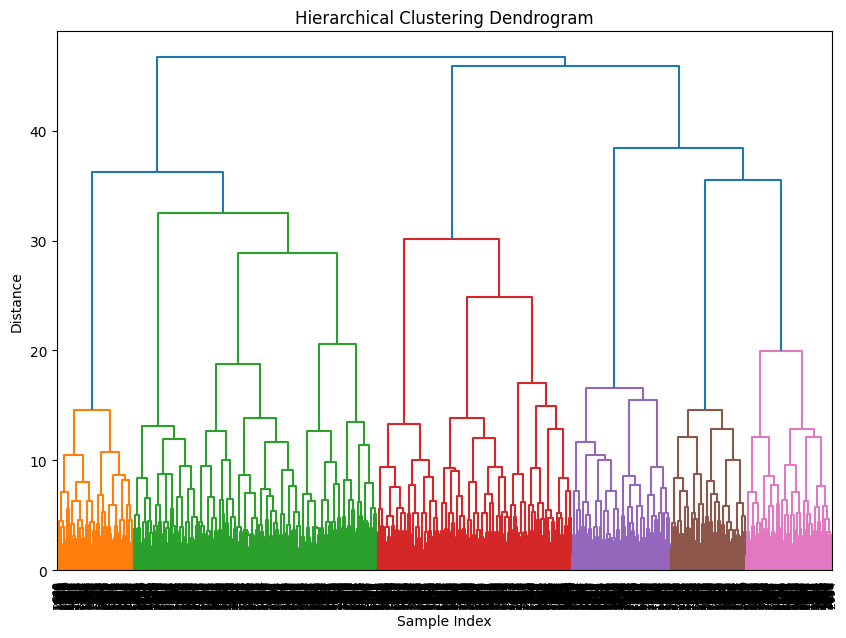

In [56]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Selecting the factor scores
factor_columns = data.columns[-9:]

# Calculating the pairwise distances between observations in n-dimensional space
dissimilarity_matrix = pdist(data[factor_columns], metric='euclidean')

# Performing hierarchical clustering using Ward's method
hc = linkage(dissimilarity_matrix, method="ward")

# Plotting the resulting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hc, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


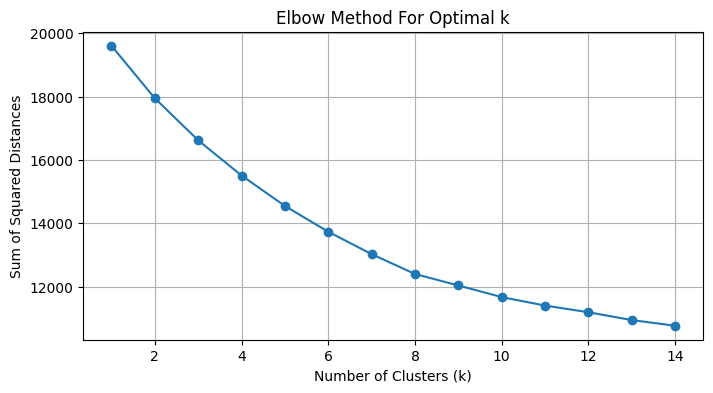

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting last nine columns which are factor scores
factor_columns = data.columns[-9:]
data_scaled = StandardScaler().fit_transform(data[factor_columns])

# Calculating the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow curve to help determine the optimal number of clusters
plt.figure(figsize=(8, 4))  # Adjust the figure size as necessary
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()


Although the Elbow method did not provide a clear indication, I utilized the Dendrogram to go forward with 3 clusters.

In [58]:
# Setting up KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=11, n_init=10)

# Fitting the model and predict cluster assignments
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Displaying the DataFrame with the new 'Cluster' column
data[['Cluster'] + list(factor_columns)]

,Cluster,Love for Fantasy and Power,Group Play,Strategy,Aversion to Destruction,Unconvetional Gameplay,Aversion Exciting and Fast,Narrative Disengagement,Aversion to Collection and Completion,Customization Focus
0,1,-1.035192,-1.233442,0.105734,1.691023,0.347916,-1.023242,-1.060618,-0.238716,1.089348
1,2,-0.824651,-0.460247,0.195685,-1.019685,1.456100,0.263046,1.129821,-0.094388,1.353965
2,0,0.753594,-0.529574,-1.228970,-0.080415,-0.874602,1.549967,0.872779,-0.507796,-0.103048
3,1,0.677448,0.283673,1.757382,0.650597,-1.479918,0.254193,0.833615,-1.007736,0.482342
4,1,-1.094369,-0.920719,1.710800,-0.857641,-0.257943,-0.452378,1.187228,-0.672593,0.324235
...,...,...,...,...,...,...,...,...,...,...
2173,1,-0.365646,-0.060515,1.512434,0.633121,0.152290,1.662941,-1.004622,0.936601,0.835267
2174,1,-0.994524,-2.051161,-0.299164,0.657449,-1.079352,0.734262,-0.258809,0.107383,0.753371
2175,1,-0.866332,-0.531900,1.774193,-0.942157,0.080189,0.942844,-0.087325,0.881321,-0.791787
2176,2,-1.413842,1.192221,0.495030,0.559583,0.719542,-0.552672,0.963252,-0.134193,-0.865564


In [59]:
# Getting cluster centers
print("Cluster Centers:")
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_,
                                  columns=factor_columns,
                                  index=['Fantasy and Power Lovers', 'Tactical Masterminds', 'Group Destructors'])

print(cluster_centers_df)

cluster_centers_df.to_csv('/content/clusters.csv')

Cluster Centers:
                          Love for Fantasy and Power  Group Play  Strategy  \
Fantasy and Power Lovers                    1.084610   -0.219341 -0.292779   
Tactical Masterminds                       -0.591629   -0.487813  0.683149   
Group Destructors                          -0.603355    0.911414 -0.517352   

                          Aversion to Destruction  Unconvetional Gameplay  \
Fantasy and Power Lovers                 0.031823                0.046340   
Tactical Masterminds                     0.314950               -0.103840   
Group Destructors                       -0.449540                0.076315   

                          Aversion Exciting and Fast  Narrative Disengagement  \
Fantasy and Power Lovers                    0.043248                -0.109425   
Tactical Masterminds                       -0.003191                 0.115676   
Group Destructors                          -0.050568                -0.011884   

                          Aversion t

We named the 3 clusters in the following way based on their loadings.

**Fantasy and Power Lover**

This cluster has significant positive loading on Love for Fantasy and Power (1.08), indicating a strong preference for games that offer immersive fantasy worlds and focuses on powering up. The negative loadings on aspects like Strategy (-0.29) and Narrative disengagement (-0.11) suggest that these gamers are less interested in strategic complexity and instead prefer fantasy based stories.

**Tactical Mastermind**

This cluster shows a substantial positive loading for Strategy (0.68), signifying a strong inclination towards strategic thinking and planning. The negative loading for Group Play (-0.48) and Love for Fantasy and Power (-0.59) implies a preference for engaging with complex strategies alone.

**Group Destructors**

This cluster has high positive loading for Group Play (0.91) indicating a preference for playing in groups, coupled with a negative loading for aversion for destruction     (-0.45). Moreover, this group also does not prefer games focused on strategic thinking. This suggests that gamers in this cluster prefer playing destructive games, which do not require serious mental engagement, in groups.


In [60]:
# Proceeding with replacing cluster numbers with labels
data['Cluster_Label'] = data['Cluster'].replace({
    0: 'Fantasy and Power Lovers',
    1: 'Tactical Masterminds',
    2: 'Group Destructors'
})

# Displaying the DataFrame with the new 'Cluster_Label' column
print(data[['Cluster_Label'] + list(factor_columns)])

                 Cluster_Label  Love for Fantasy and Power  Group Play  \
0         Tactical Masterminds                   -1.035192   -1.233442   
1            Group Destructors                   -0.824651   -0.460247   
2     Fantasy and Power Lovers                    0.753594   -0.529574   
3         Tactical Masterminds                    0.677448    0.283673   
4         Tactical Masterminds                   -1.094369   -0.920719   
...                        ...                         ...         ...   
2173      Tactical Masterminds                   -0.365646   -0.060515   
2174      Tactical Masterminds                   -0.994524   -2.051161   
2175      Tactical Masterminds                   -0.866332   -0.531900   
2176         Group Destructors                   -1.413842    1.192221   
2177  Fantasy and Power Lovers                    0.389081   -1.359068   

      Strategy  Aversion to Destruction  Unconvetional Gameplay  \
0     0.105734                 1.691023     

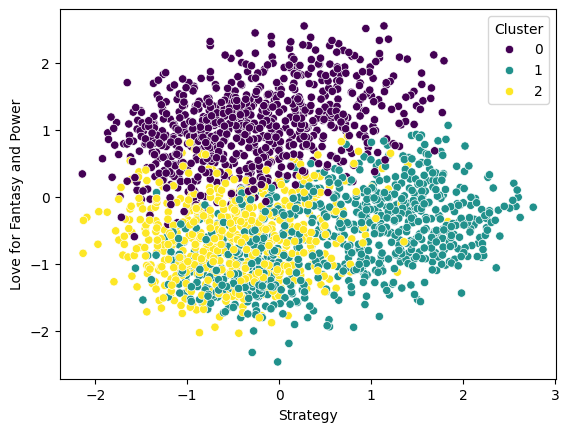

In [61]:
# Visualizing K-means clusters
import seaborn as sns

sns.scatterplot(data=data, x='Strategy', y='Love for Fantasy and Power', hue='Cluster', palette='viridis')
plt.show()

## Demogaphic Analysis

In [62]:
# Creating bins for age
data['Age_Group'] = pd.cut(data['age'], bins=[0, 18, 35, 56, 100], labels=['Under 18', '18-34', '35-55', '55+'], right=False)

# Creating bins for income
data['Income_Group'] = pd.cut(data['income'], bins=[0, 50000, 100001, float('inf')], labels=['Under 50K', '50K-100K', 'Over 100K'], right=False)

In [63]:
# Cross-tabulation of Age Group and Cluster Label
age_cluster_xtab = pd.crosstab(data['Age_Group'], data['Cluster_Label'])

# Cross-tabulation of Income Group and Cluster Label
income_cluster_xtab = pd.crosstab(data['Income_Group'], data['Cluster_Label'])

# Displaying the cross-tabulations
print("Cross-Tabulation of Age Groups and Cluster Labels:")
print(age_cluster_xtab)
print("\nCross-Tabulation of Income Groups and Cluster Labels:")
print(income_cluster_xtab)

Cross-Tabulation of Age Groups and Cluster Labels:
Cluster_Label  Fantasy and Power Lovers  Group Destructors  \
Age_Group                                                    
18-34                               619                545   
35-55                               104                 60   
55+                                  49                  7   

Cluster_Label  Tactical Masterminds  
Age_Group                            
18-34                           631  
35-55                           144  
55+                              19  

Cross-Tabulation of Income Groups and Cluster Labels:
Cluster_Label  Fantasy and Power Lovers  Group Destructors  \
Income_Group                                                 
Under 50K                           431                374   
50K-100K                            276                196   
Over 100K                            65                 42   

Cluster_Label  Tactical Masterminds  
Income_Group                         
Under 

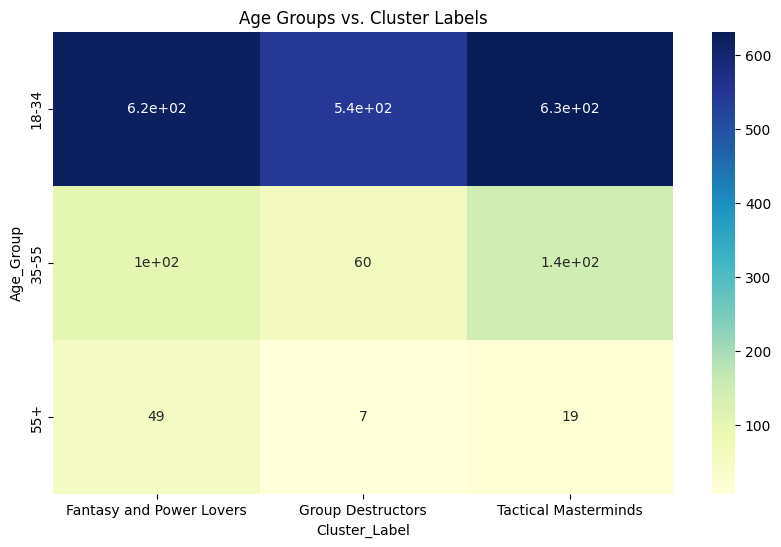

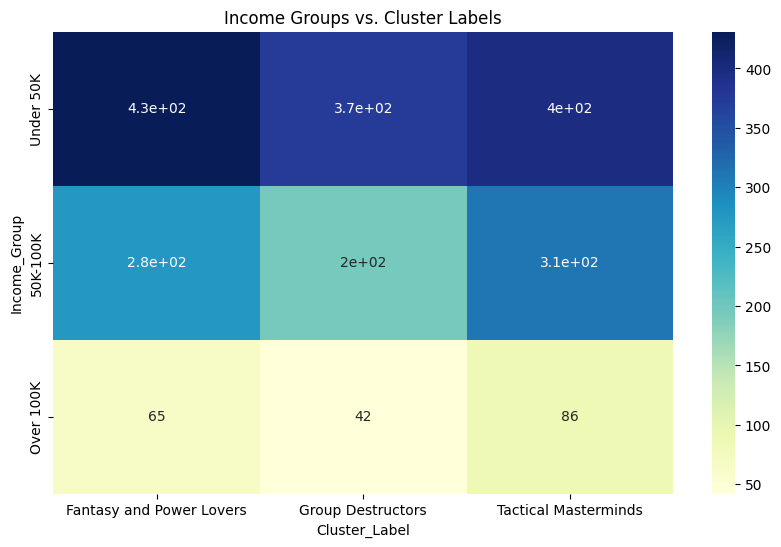

In [64]:
# Visualizing results
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Age Groups vs. Cluster Labels
plt.figure(figsize=(10, 6))
sns.heatmap(age_cluster_xtab, annot=True, cmap="YlGnBu")
plt.title('Age Groups vs. Cluster Labels')
plt.show()

# Heatmap of Income Groups vs. Cluster Labels
plt.figure(figsize=(10, 6))
sns.heatmap(income_cluster_xtab, annot=True, cmap="YlGnBu")
plt.title('Income Groups vs. Cluster Labels')
plt.show()

In [65]:
# Crosstabulation of Gender and Cluster Labels without normalization (counting occurrences)
gender_cluster_xtab = pd.crosstab(data['gender'], data['Cluster_Label'])

# Displaying the results for gender
print("\nCross-Tabulation of Gender and Cluster Labels:")
print(gender_cluster_xtab)


Cross-Tabulation of Gender and Cluster Labels:
Cluster_Label  Fantasy and Power Lovers  Group Destructors  \
gender                                                       
female                              401                233   
male                                367                375   
nonbinary                             4                  4   

Cluster_Label  Tactical Masterminds  
gender                               
female                          367  
male                            420  
nonbinary                         7  


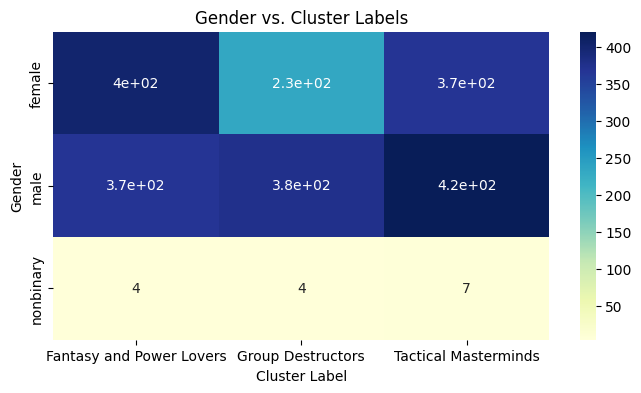

In [66]:
# Heatmap of Gender vs. Cluster Labels
plt.figure(figsize=(8, 4))
sns.heatmap(gender_cluster_xtab, annot=True, cmap="YlGnBu")
plt.title('Gender vs. Cluster Labels')
plt.ylabel('Gender')
plt.xlabel('Cluster Label')
plt.show()

In [67]:
import pandas as pd

# Defining the region mappings
northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south = ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
west = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

# Defining function to map states to regions
def map_state_to_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    return 'Other'  # Handle any unexpected or missing state values as 'Other'

# Applying the function to the 'state' column and creating a new 'region' column
data['region'] = data['state'].apply(map_state_to_region)

In [68]:
# Crosstabulation of Region and Cluster Labels
region_cluster_xtab = pd.crosstab(data['region'], data['Cluster_Label'])

# Displaying the results for regions
print("\nCross-Tabulation of Region and Cluster Labels:")
print(region_cluster_xtab)


Cross-Tabulation of Region and Cluster Labels:
Cluster_Label  Fantasy and Power Lovers  Group Destructors  \
region                                                       
Midwest                             186                117   
Northeast                           109                116   
South                               297                230   
West                                180                149   

Cluster_Label  Tactical Masterminds  
region                               
Midwest                         169  
Northeast                       135  
South                           302  
West                            188  


In [69]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Crosstab between cluster labels and age groups with chi-square test
crosstab_result = pd.crosstab(data['Cluster_Label'], data['Age_Group'])

chi2, p_value, _, expected = chi2_contingency(crosstab_result)

# Converting expected frequencies to a DataFrame for easier handling
expected_df = pd.DataFrame(expected, index=crosstab_result.index, columns=crosstab_result.columns)

# Calculating chi-square contributions for each cell
chi_square_contributions = (crosstab_result - expected_df)**2 / expected_df


In [70]:
# Display the results
print("Observed Frequencies:\n", crosstab_result)
print("\nExpected Frequencies:\n", expected_df)
print("\nChi-square Contributions:\n", chi_square_contributions)
print("\nChi-squared Statistic: ", chi2)
print("P-value: ", p_value)

Observed Frequencies:
 Age_Group                 18-34  35-55  55+
Cluster_Label                              
Fantasy and Power Lovers    619    104   49
Group Destructors           545     60    7
Tactical Masterminds        631    144   19

Expected Frequencies:
 Age_Group                      18-34       35-55        55+
Cluster_Label                                              
Fantasy and Power Lovers  636.244261  109.171717  26.584022
Group Destructors         504.380165   86.545455  21.074380
Tactical Masterminds      654.375574  112.282828  27.341598

Chi-square Contributions:
 Age_Group                    18-34     35-55        55+
Cluster_Label                                          
Fantasy and Power Lovers  0.467375  0.244996  18.901431
Group Destructors         3.271284  8.142093   9.399478
Tactical Masterminds      0.835021  8.959331   2.544923

Chi-squared Statistic:  52.7659327225794
P-value:  9.539020584375138e-11


The statistically significant p-value indicates that there is a relationship between age and clusters. The chi-square values are higher than 3.84 for the 35-55 and 55+ buckets of Group Destructors. Looking at the expected and observed values, it is evident that these players are less likely to be in the 35 and above age groups. Fantasy and Power Lovers also has a chi-square above 3.84 for the 55+ age bucket and higher observed value vis-a-vis expected indicates that older gamers are more likely to be drawn to immersive fantasy experiences. Finally, tactical masterminds are more likely to be in the 35-55 age group (chi-square 8.96> 3.84), showing the preference of players in this age group for strategic gameplay.

In [71]:
# Crosstab between cluster labels and income groups
income_crosstab = pd.crosstab(data['Cluster_Label'], data['Income_Group'])

# Chi-squared test for income
chi2_income, p_value_income, _, expected_income = chi2_contingency(income_crosstab)

# Converting expected frequencies to a DataFrame for income
expected_income_df = pd.DataFrame(expected_income, index=income_crosstab.index, columns=income_crosstab.columns)

# Calculating chi-square contributions for each cell for income
chi_square_contributions_income = (income_crosstab - expected_income_df)**2 / expected_income_df

# Displaying the results for income
print("Income Group Analysis")
print("Observed Frequencies:\n", income_crosstab)
print("\nExpected Frequencies:\n", expected_income_df)
print("\nChi-square Contributions:\n", chi_square_contributions_income)
print("\nChi-squared Statistic: ", chi2_income)
print("P-value: ", p_value_income)

Income Group Analysis
Observed Frequencies:
 Income_Group              Under 50K  50K-100K  Over 100K
Cluster_Label                                           
Fantasy and Power Lovers        431       276         65
Group Destructors               374       196         42
Tactical Masterminds            397       311         86

Expected Frequencies:
 Income_Group               Under 50K    50K-100K  Over 100K
Cluster_Label                                              
Fantasy and Power Lovers  426.053260  277.537190  68.409550
Group Destructors         337.752066  220.016529  54.231405
Tactical Masterminds      438.194674  285.446281  70.359045

Chi-square Contributions:
 Income_Group              Under 50K  50K-100K  Over 100K
Cluster_Label                                           
Fantasy and Power Lovers   0.057435  0.008514   0.169933
Group Destructors          3.890169  2.621592   2.758683
Tactical Masterminds       3.872711  2.287620   3.477015

Chi-squared Statistic:  19.14367

The chi-square test results for the relationship between income groups and player clusters indicate a statistically significant association, with a p-value well below the threshold for significance. For under 50K bucket of Group Destructors (chi-square 3.89> 3.84), the observed value is higher than expected, meaning Group Destructors are more likely to be in the under 50K income group, reflecting less solvency. Conversely, for Tactical Masterminds the observed value is lower than expected for the under 50K group (chi-square 3.87> 3.84), indicating that these players are usually stronger financially.

In [72]:
# Crosstab between cluster labels and gender
gender_crosstab = pd.crosstab(data['Cluster_Label'], data['gender'])

# Chi-squared test for gender
chi2_gender, p_value_gender, _, expected_gender = chi2_contingency(gender_crosstab)

# Converting expected frequencies to a DataFrame for gender
expected_gender_df = pd.DataFrame(expected_gender, index=gender_crosstab.index, columns=gender_crosstab.columns)

# Calculating chi-square contributions for each cell for gender
chi_square_contributions_gender = (gender_crosstab - expected_gender_df)**2 / expected_gender_df

# Displaying the results for gender
print("\nGender Analysis")
print("Observed Frequencies:\n", gender_crosstab)
print("\nExpected Frequencies:\n", expected_gender_df)
print("\nChi-square Contributions:\n", chi_square_contributions_gender)
print("\nChi-squared Statistic: ", chi2_gender)
print("P-value: ", p_value_gender)



Gender Analysis
Observed Frequencies:
 gender                    female  male  nonbinary
Cluster_Label                                    
Fantasy and Power Lovers     401   367          4
Group Destructors            233   375          4
Tactical Masterminds         367   420          7

Expected Frequencies:
 gender                        female        male  nonbinary
Cluster_Label                                              
Fantasy and Power Lovers  354.808081  411.875115   5.316804
Group Destructors         281.272727  326.512397   4.214876
Tactical Masterminds      364.919192  423.612489   5.468320

Chi-square Contributions:
 gender                      female      male  nonbinary
Cluster_Label                                          
Fantasy and Power Lovers  6.013655  4.889288   0.326131
Group Destructors         8.284686  7.200485   0.010954
Tactical Masterminds      0.011865  0.030807   0.429025

Chi-squared Statistic:  27.19689556298809
P-value:  1.813743407005719e-05


The statistically significant p-value evidences a relationship between clusters and genders. For Group Destructors, the observed and expected values for males and females (chi-square> 3.84 for both) indicates that these players are more likely to be males. Conversely, for Fantasy and Power Lovers, the observed and expected values for male and females indicate that these players are more likely to be females.

In [73]:
# Crosstab between cluster labels and income groups
region_crosstab = pd.crosstab(data['Cluster_Label'], data['region'])

# Chi-squared test for income
chi2_region, p_value_region, _, expected_region = chi2_contingency(region_crosstab)

# Converting expected frequencies to a DataFrame for income
expected_region_df = pd.DataFrame(expected_region, index=region_crosstab.index, columns=region_crosstab.columns)

# Calculating chi-square contributions for each cell for income
chi_square_contributions_region = (region_crosstab - expected_region_df)**2 / expected_region_df

# Displaying the results for income
print("Region Analysis")
print("Observed Frequencies:\n", region_crosstab)
print("\nExpected Frequencies:\n", expected_region_df)
print("\nChi-square Contributions:\n", chi_square_contributions_region)
print("\nChi-squared Statistic: ", chi2_region)
print("P-value: ", p_value_region)

Region Analysis
Observed Frequencies:
 region                    Midwest  Northeast  South  West
Cluster_Label                                            
Fantasy and Power Lovers      186        109    297   180
Group Destructors             117        116    230   149
Tactical Masterminds          169        135    302   188

Expected Frequencies:
 region                       Midwest   Northeast       South        West
Cluster_Label                                                           
Fantasy and Power Lovers  167.302112  127.603306  293.842057  183.252525
Group Destructors         132.628099  101.157025  232.942149  145.272727
Tactical Masterminds      172.069789  131.239669  302.215794  188.474747

Chi-square Contributions:
 region                     Midwest  Northeast     South      West
Cluster_Label                                                    
Fantasy and Power Lovers  2.089699   2.712179  0.033939  0.057729
Group Destructors         1.841521   2.177940  0.037160 

In [74]:
# Cross-tabulation of Cluster Labels and Gender
crosstab_gender = pd.crosstab(data['Cluster_Label'], data['gender'], normalize='index')  # Normalized by index to get percentages

# Display the cross-tabulation
print("Cross-Tabulation of Cluster Labels and Gender:")
print(crosstab_gender)

Cross-Tabulation of Cluster Labels and Gender:
gender                      female      male  nonbinary
Cluster_Label                                          
Fantasy and Power Lovers  0.519430  0.475389   0.005181
Group Destructors         0.380719  0.612745   0.006536
Tactical Masterminds      0.462217  0.528967   0.008816


The p-value of 0.16 is not statistically significant and none of the chi-square values are above 3.84. Therefore, there is no distinguishable relationship between region and players from the identified segments.

In [75]:
# Calculating mean for Age and Income
cluster_stats = data.groupby('Cluster_Label')[['age', 'income']].mean() # Changed tuple to a list

# Displaying the average age and income per cluster
print("Average Age and Income per Cluster:")
print(cluster_stats)

Average Age and Income per Cluster:
                                age        income
Cluster_Label                                    
Fantasy and Power Lovers  28.795337  50910.621762
Group Destructors         25.380719  45879.084967
Tactical Masterminds      28.724181  55159.949622


In [76]:
# Regression analysis using age to understand relationships with clusters
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Encoding the labels according to your specific mapping
label_mapping = {
    'Group Destructors': 0,
    'Fantasy and Power Lovers': 1,
    'Tactical Masterminds': 2
}

data['Cluster_Label_Encoded'] = data['Cluster_Label'].map(label_mapping)

# Creating dummy variables for the clusters, explicitly dropping 'Independent Soloists'
data['Cluster_Fantasy_and_Power_Lovers'] = (data['Cluster_Label'] == 'Fantasy and Power Lovers').astype(float)
data['Cluster_Tactical_Masterminds'] = (data['Cluster_Label'] == 'Tactical Masterminds').astype(float)

# Preparing the features and target
X = data[['Cluster_Fantasy_and_Power_Lovers', 'Cluster_Tactical_Masterminds']]  # Independent variables are the cluster dummies
y = data['age']  # Dependent variable

# Adding a constant to the model (intercept)
X = add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Printing the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     25.84
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           8.15e-12
Time:                        19:55:34   Log-Likelihood:                -8073.6
No. Observations:                2178   AIC:                         1.615e+04
Df Residuals:                    2175   BIC:                         1.617e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

The p-value is statistically significant for all co-efficient. The intercept of 25.34 indicates the mean age of the Group Destructors segment while the positive coefficients of Fantasy and Power Lovers and Tactical Masterminds indicate that these segments are, on average, 3.4 years older than the Group Destructors segment.

In [77]:
# Regression analysis using age to understand relationships with clusters
# Preparing the features and target
X = data[['Cluster_Fantasy_and_Power_Lovers', 'Cluster_Tactical_Masterminds']]  # Independent variables are the cluster dummies
y = data['income']  # Dependent variable

# Adding a constant to the model (intercept)
X = add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Printing the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.99
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           9.22e-07
Time:                        19:55:34   Log-Likelihood:                -25725.
No. Observations:                2178   AIC:                         5.146e+04
Df Residuals:                    2175   BIC:                         5.147e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

The p-value is statistically significant for all co-efficient. The intercept of 45,880 dollars indicates the mean income of the Group Destructors segment while the positive coefficients of Fantasy and Power Lovers and Tactical Masterminds indicate that these segments are wealthier. In fact, Tactical Masterminds have the highest average income among all three segments.

Overall, I believe that Group Destructors are young players and mostly males, who do not have a very strong financial position. On the other hand, Fantasy and Power Lovers and Tactical Masterminds are likely to be above 35 with a higher income, indicating more mature and established segments.

In [78]:
# Tackling missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

print(data['gg.maxprice'].isnull().sum())

# Using Multiple Imputation
imputer = IterativeImputer(estimator=RandomForestRegressor(), initial_strategy='median', random_state=0)

grouped = data.groupby('gg.game.presented')
imputed_data = pd.DataFrame()

for name, group in grouped:
    group_imputed = group.copy()
    group_imputed[['gg.maxprice']] = imputer.fit_transform(group[['gg.maxprice']])
    imputed_data = pd.concat([imputed_data, group_imputed], ignore_index=True)

print(imputed_data['gg.maxprice'].isnull().sum())

138
0


I opted for multiple imputations because it offers a more nuanced treatment of missing data by creating several plausible imputations, enabling a better assessment of uncertainty compared to other methods such as mean imputation and regression imputation.

## Gabor Granger Analysis

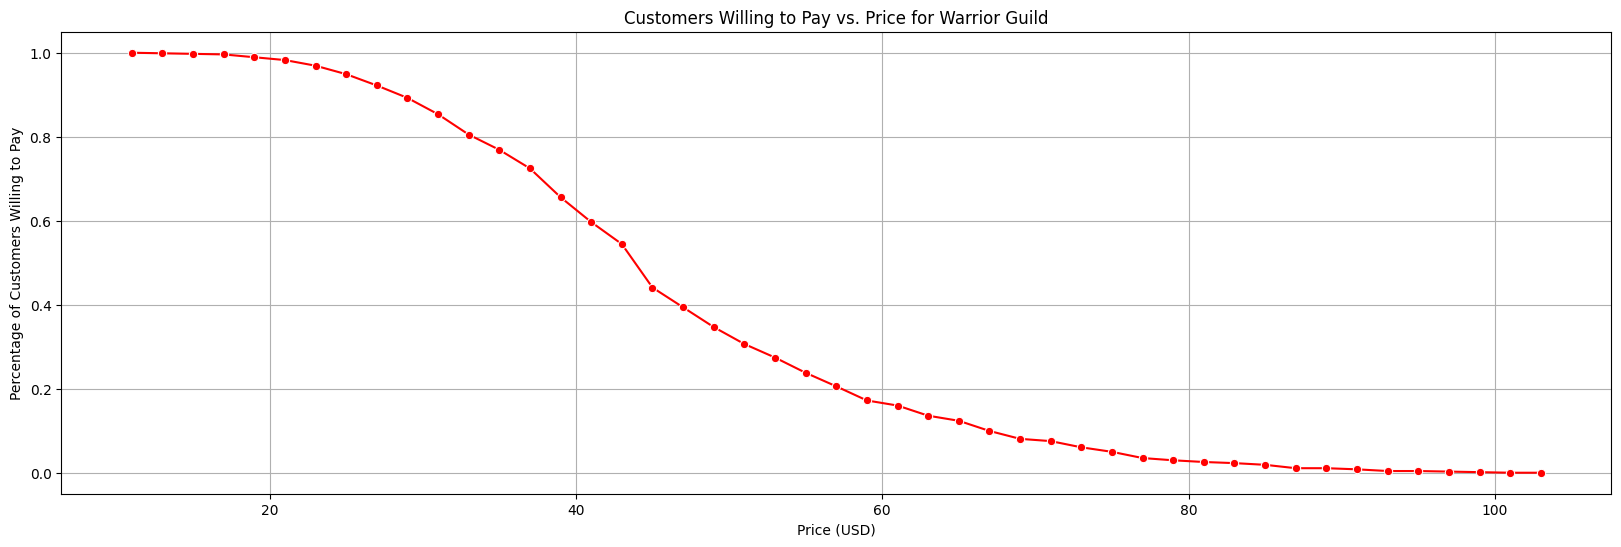

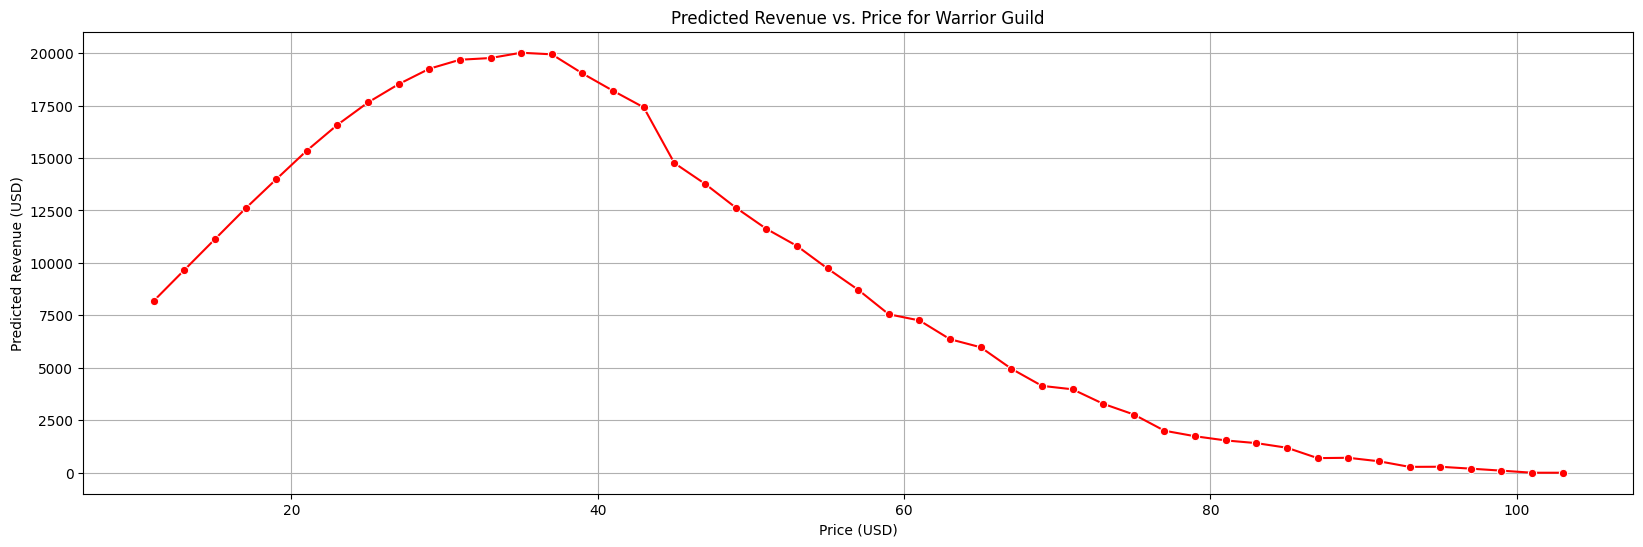

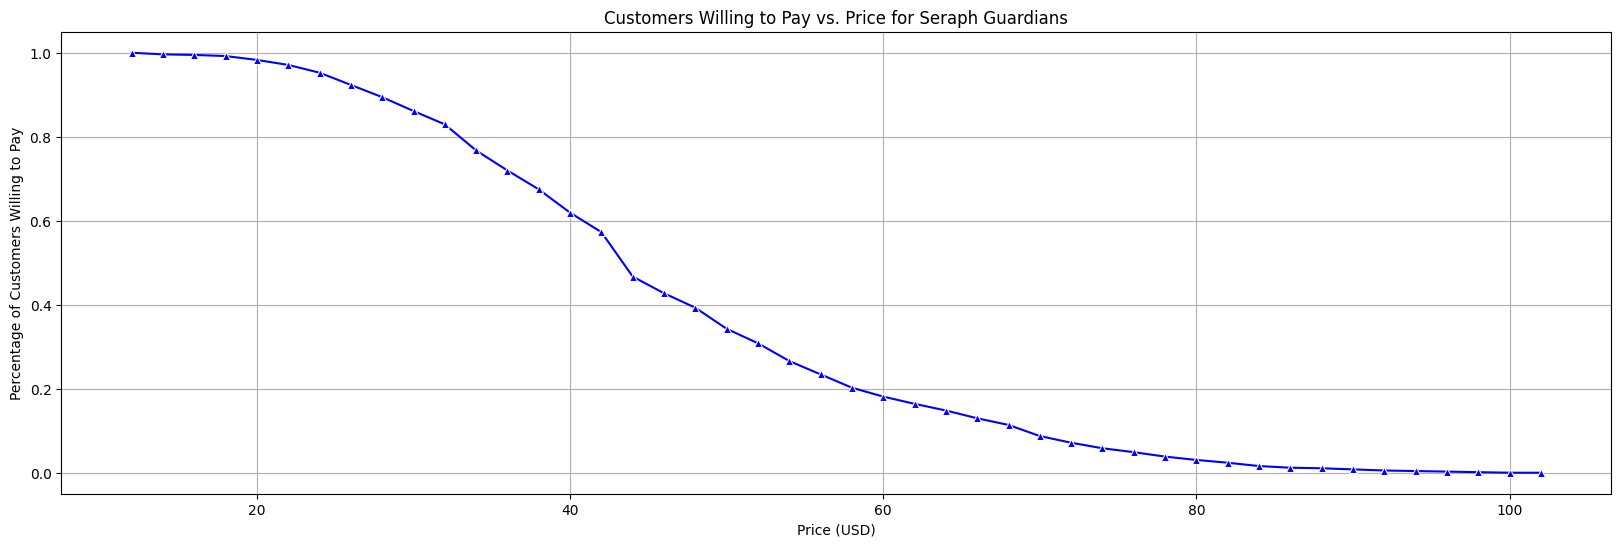

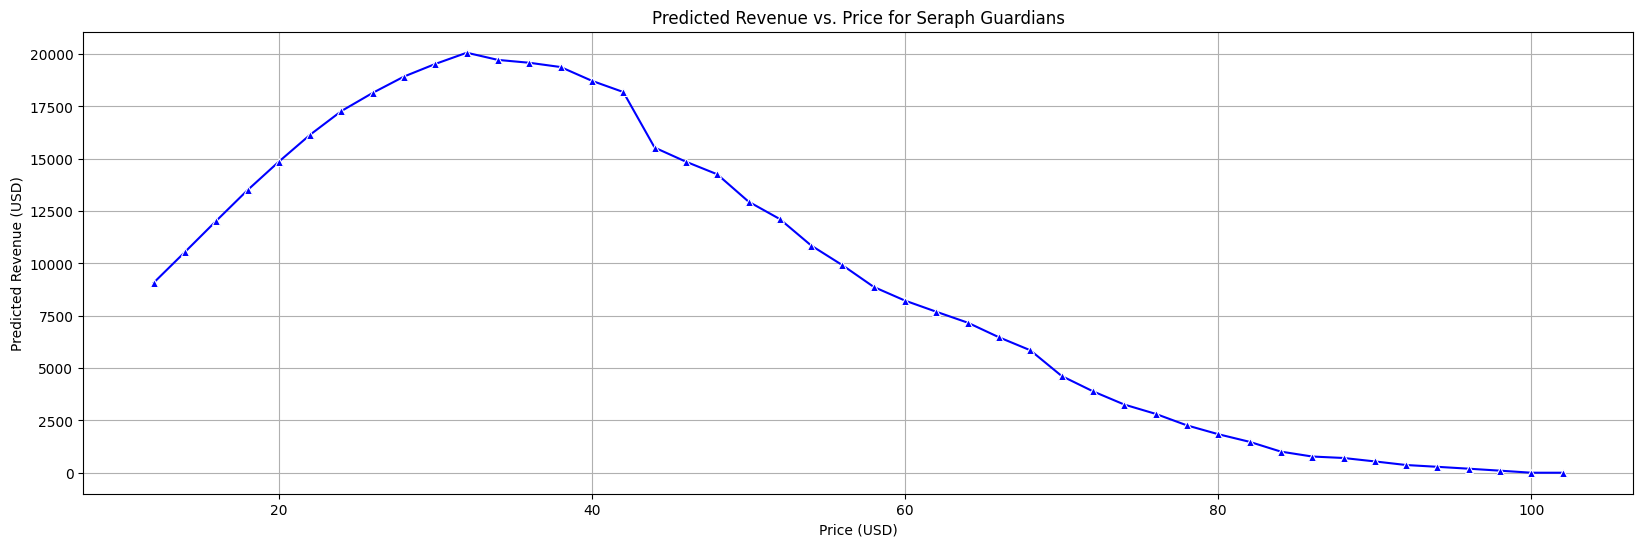

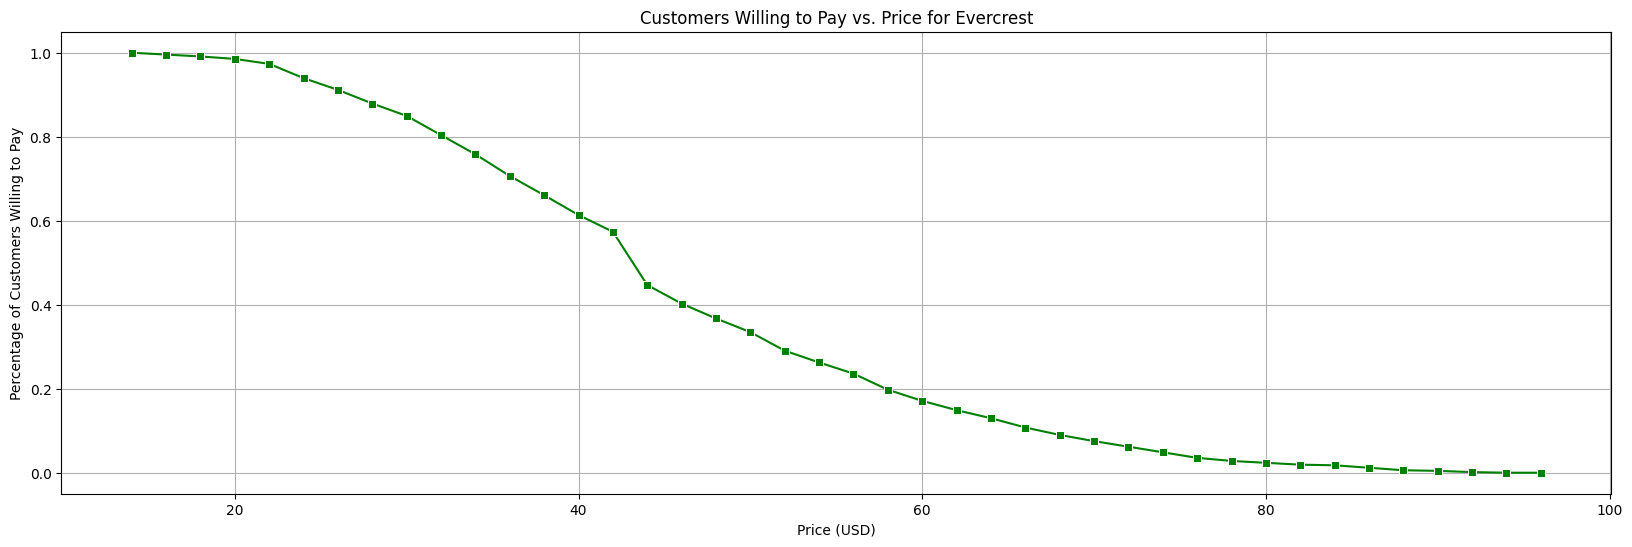

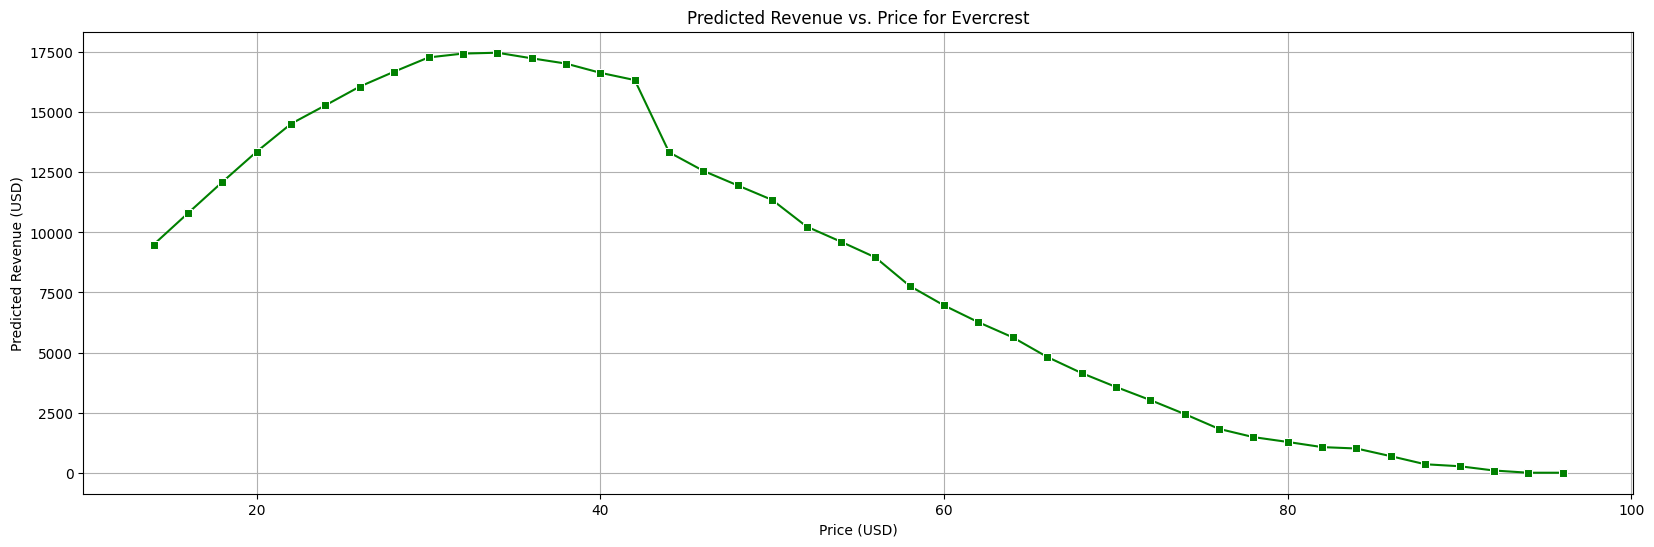

In [79]:
import numpy as np

# Unique games presented
games = ['Warrior Guild', 'Seraph Guardians', 'Evercrest']

# Prepareing to store the results for all games
all_games_wtp = {}

for game in games:
    # Filtering data for the current game
    game_data = imputed_data[imputed_data['gg.game.presented'] == game]

    # Preparing a list to store data for the current game
    game_wtp_data = []

    # Iterating over a range of prices
    for price in np.arange(game_data['gg.maxprice'].min(), game_data['gg.maxprice'].max() + 5, 2):
        num_respondents_wtp = sum(game_data['gg.maxprice'] >= price)
        percentage_wtp = num_respondents_wtp / len(game_data)
        predicted_revenue = num_respondents_wtp * price

        # Appending data as a dictionary to the list
        game_wtp_data.append({
            'price': price,
            'per_customers_wtp': percentage_wtp,
            'pred_revenue': predicted_revenue
        })

    # Creating a DataFrame from the list for the current game
    cumulative_wtp = pd.DataFrame(game_wtp_data)

    # Storing results for each game
    all_games_wtp[game] = cumulative_wtp

    # Customizing plot settings based on the game
    if game == 'Warrior Guild':
        color = 'red'
        marker = 'o'
    elif game == 'Seraph Guardians':
        color = 'blue'
        marker = '^'
    elif game == 'Evercrest':
        color = 'green'
        marker = 's'

    # Plotting customers willing to pay for this game
    plt.figure(figsize=(20, 6))
    sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp, marker=marker, color=color)
    plt.xlabel('Price (USD)')
    plt.ylabel('Percentage of Customers Willing to Pay')
    plt.title(f'Customers Willing to Pay vs. Price for {game}')
    plt.grid(True)
    plt.show()

    # Plotting predicted revenue for this game
    plt.figure(figsize=(20, 6))
    sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp, marker=marker, color=color)
    plt.xlabel('Price (USD)')
    plt.ylabel('Predicted Revenue (USD)')
    plt.title(f'Predicted Revenue vs. Price for {game}')
    plt.grid(True)
    plt.show()

For Warrior Guild, the highest willingness to pay is around 15 dollars. However, we want to ensure that our revenue gets boosted, even if that means a smaller number of people paying for our game. Therefore, the optimal price for Warrior Guild will be 36 dollars, where revenue is predicted to be the highest.  

Following the same approach of Warrior Guild, we see that the highest predicted revenue is 32 dollars for Seraph Guardians. Therefore, that will be considered as the optimal price.

Similarly, for Evercrest, the highest predicted revenue is at 34 dollars. Therefore, that will be considered as the optimal price.

In [80]:
# Printing the DataFrame for Seraph Guardians
if 'Seraph Guardians' in all_games_wtp:
    print(all_games_wtp['Seraph Guardians'])
else:
    print("Data for Seraph Guardians is not available.")

    price  per_customers_wtp  pred_revenue
0    12.0           1.000000        9072.0
1    14.0           0.996032       10542.0
2    16.0           0.994709       12032.0
3    18.0           0.992063       13500.0
4    20.0           0.982804       14860.0
5    22.0           0.970899       16148.0
6    24.0           0.952381       17280.0
7    26.0           0.923280       18148.0
8    28.0           0.894180       18928.0
9    30.0           0.861111       19530.0
10   32.0           0.829365       20064.0
11   34.0           0.767196       19720.0
12   36.0           0.719577       19584.0
13   38.0           0.674603       19380.0
14   40.0           0.619048       18720.0
15   42.0           0.572751       18186.0
16   44.0           0.466931       15532.0
17   46.0           0.427249       14858.0
18   48.0           0.392857       14256.0
19   50.0           0.342593       12950.0
20   52.0           0.308201       12116.0
21   54.0           0.265873       10854.0
22   56.0  

In [81]:
# Exploring willingness to pay for different games
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Creating dummy variables manually, setting 'Independent Soloists' as the reference by not creating a dummy for it
imputed_data['Cluster_Fantasy_and_Power_Lovers'] = (imputed_data['Cluster_Label'] == 'Fantasy and Power Lovers').astype(int)
imputed_data['Cluster_Tactical_Masterminds'] = (imputed_data['Cluster_Label'] == 'Tactical Masterminds').astype(int)

# Listing of games to analyze
games = data['gg.game.presented'].unique()

# Analyzing each game
for game in games:
    print(f"\nAnalyzing game: {game}")
    game_data = imputed_data[imputed_data['gg.game.presented'] == game]

    # Preparing the features and the target
    X = game_data[['Cluster_Fantasy_and_Power_Lovers', 'Cluster_Tactical_Masterminds']]  # Use the dummy variables
    y = game_data['gg.maxprice']  # Target variable

    # Adding a constant to the model to include the intercept
    X = sm.add_constant(X)

    # Creating and fit the model
    model = sm.OLS(y, X)
    results = model.fit()

    # Printing the summary of the model
    print(results.summary())


Analyzing game: Warrior Guild
                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.306
Date:                Thu, 06 Mar 2025   Prob (F-statistic):            0.00193
Time:                        19:55:37   Log-Likelihood:                -3064.0
No. Observations:                 744   AIC:                             6134.
Df Residuals:                     741   BIC:                             6148.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

From the analyses, it is evident that Fantasy and Power Lovers are the most interested segment in all games while Group Destructors are the least interested in all of them. However, it is important to highlight that Group Destructors may be willing to pay less since they are less solvent and so using willingness to pay as a predictor of interest may not be accurate.

Among all the games, Fantasy and Power Lovers are willing to pay the most for Evercrest, which makes sense given the fantasy world-based components of that game. Moreover, Group Destructors are willing to pay the most for Warrior Guild, which also makes sense given it is a multiplayer battle arena game. Furthermore, Tactical Masterminds are willing to pay the most for Seraph Guardians which aligns with their need for strategic elements in a game.


## Revenue Estimation

In [82]:
# Calculate gross revenue based on optimal price point from Gabor Granger analysis
predicted_gross_revenues = {}

for game, data in all_games_wtp.items():
    optimal_price_info = data.loc[data['pred_revenue'].idxmax()]
    optimal_price = optimal_price_info['price']
    num_respondents_at_optimal = sum(imputed_data[imputed_data['gg.game.presented'] == game]['gg.maxprice'] >= optimal_price)
    percentage_conversion = num_respondents_at_optimal / len(imputed_data[imputed_data['gg.game.presented'] == game])
    estimated_buyers = percentage_conversion * 0.3 * 10000000  # 30% conversion of interested players
    gross_revenue = estimated_buyers * optimal_price
    predicted_gross_revenues[game] = gross_revenue

    print(f'Game: {game}, Optimal Price: ${optimal_price}, Estimated Gross Revenue: ${gross_revenue:,.2f}')

Game: Warrior Guild, Optimal Price: $35.0, Estimated Gross Revenue: $80,725,806.45
Game: Seraph Guardians, Optimal Price: $32.0, Estimated Gross Revenue: $79,619,047.62
Game: Evercrest, Optimal Price: $34.0, Estimated Gross Revenue: $77,327,433.63


I noticed that Warrior Guild achieves the highest gross revenue, with Seraph Guardians trailing very closely behind. I then looked into the net revenue to understand how incorporating costs can change the financial position.

In [88]:
def calculate_net_revenue(predicted_gross_revenue, development_cost):
    fixed_costs = 7e6  # $7 million for acquisition and marketing
    royalties = 0.05 * predicted_gross_revenue  # 5% royalties to the developer

    # Calculating Valve's cut based on the tiered structure
    if predicted_gross_revenue <= 10e6:
        valve_cut = 0.30 * predicted_gross_revenue
    elif predicted_gross_revenue <= 50e6:
        valve_cut = 0.30 * 10e6 + 0.25 * (predicted_gross_revenue - 10e6)
    else:
        valve_cut = 0.30 * 10e6 + 0.25 * 40e6 + 0.20 * (predicted_gross_revenue - 50e6)

    # Net revenue after all deductions
    net_revenue = predicted_gross_revenue - (royalties + valve_cut + development_cost + fixed_costs)
    return net_revenue

# Including development costs for each game
development_costs = {
    'Warrior Guild': 5e6,
    'Seraph Guardians': 5.5e6,
    'Evercrest': 6e6
}

net_revenues = {}

for game, gross_revenue in predicted_gross_revenues.items():
    net_revenue = calculate_net_revenue(gross_revenue, development_costs[game])
    net_revenues[game] = net_revenue
    print(f"Net revenue for {game}: ${net_revenue:,.2f}")

Net revenue for Warrior Guild: $45,544,354.84
Net revenue for Seraph Guardians: $44,214,285.71
Net revenue for Evercrest: $41,995,575.22


Similar to gross revenue results, Warrior Guild comes out as the game with the highest net revenue, followed by Seraph Guardians. However, given the differences are not significant as per this analysis, Athena should not drop any particular games from consideration.

In [85]:
# Understanding which cluster has higher share of liking towards Seraph Guardians
# Filter the data to find rows where Seraph Guardians is ranked 1 by Tactical Masterminds
tactical_masterminds_rank1_sg = imputed_data[(imputed_data['rank.SeraphGuardians'] == 1) & (imputed_data['Cluster_Label'] == 'Tactical Masterminds')]

# Display the filtered rows
print("Percentage of Tactical Masterminds who ranked Seraph Guardians as 1:", len(tactical_masterminds_rank1_sg)/len(imputed_data[imputed_data['Cluster_Label'] == 'Tactical Masterminds']))

# Filter the data to find rows where Seraph Guardians is ranked 1 by Fantasy and Power Lovers
Fantasy_Lovers_rank1_sg = imputed_data[(imputed_data['rank.SeraphGuardians'] == 1) & (imputed_data['Cluster_Label'] == 'Fantasy and Power Lovers')]

# Display the filtered rows
print("Percentage of Fantasy Lovers who ranked Seraph Guardians as 1:", len(Fantasy_Lovers_rank1_sg)/len(imputed_data[imputed_data['Cluster_Label'] == 'Fantasy and Power Lovers']))


Percentage of Tactical Masterminds who ranked Seraph Guardians as 1: 0.6020151133501259
Percentage of Fantasy Lovers who ranked Seraph Guardians as 1: 0.5699481865284974


In [87]:
def calculate_market_share(data):
    # Counting the number of times each game is ranked 1
    game_ranks = ['rank.WarriorGuild', 'rank.SeraphGuardians', 'rank.Evercrest',
                  'rank.DevilsGate', 'rank.Marksman', 'rank.QuestoftheTitan']
    market_shares = {}

    #Using imputed_data instead of data since this is where the ranking columns are present
    for rank_column in game_ranks:
        game_name = rank_column.split('.')[1]
        # Counting how many respondents ranked this game as 1
        count_rank_1 = (imputed_data[rank_column] == 1).sum()
        market_shares[game_name] = count_rank_1

    # Total number of respondents who ranked any game as 1
    total_rank_1 = sum(market_shares.values())

    # Calculating market share percentages
    if total_rank_1 > 0:
        market_shares = {game: (share / total_rank_1) * 100 for game, share in market_shares.items()}
    else:
        print("No respondents ranked a game as 1, can't compute market shares.")

    return market_shares

market_shares = calculate_market_share(imputed_data) #Passing imputed_data instead of data

# Displaying the market shares
for game, share in market_shares.items():
    print(f"Market share for {game}: {share:.2f}%")

Market share for WarriorGuild: 13.18%
Market share for SeraphGuardians: 50.05%
Market share for Evercrest: 9.78%
Market share for DevilsGate: 18.60%
Market share for Marksman: 2.30%
Market share for QuestoftheTitan: 6.11%


Interestingly, Seraph Guardians is by far the winner among the competitors with more than half of the respondents marking it as their most preferred game. This indicates that Seraph Guardians will be a strong choice when deciding on the game to acquire.

I wanted to apply the modifications related to pricing and multiple purchase opportunities to simulate the market share. It is important to note that during the simulations the prices of different games will vary and so this exercise will somewhat capture the impact of competitors lowering prices to dominate.

In [ ]:
def run_simulation(data, game_prices, price_elasticity_factor, rank_probabilities):
    # Considering price elasticity
    price_elasticities = {game: max(0, 1.0 - price_elasticity_factor * price) for game, price in game_prices.items()}

    # Initializing market shares
    market_shares = {game: 0 for game in game_prices.keys()}

    # Simulating market shares
    for index, row in data.iterrows():
        for game, price in game_prices.items():
            rank_column = f'rank.{game}'
            if rank_column in data.columns:
                rank = row[rank_column]
                if rank in rank_probabilities:
                    adjusted_probability = rank_probabilities[rank] * price_elasticities[game]
                    market_shares[game] += adjusted_probability

    # Checking for zero total before division
    total_shares = sum(market_shares.values())
    if total_shares > 0:
    # Normalizing market shares to sum to 100%
        market_shares = {game: (share / total_shares) * 100 for game, share in market_shares.items()}
    else:
        print("Total market shares sum to zero, can't normalize.")
    return market_shares

# Probabilities for each rank allowing multiple purchases
rank_probabilities = {
    1: 0.90,
    2: 0.75,
    3: 0.60,
    4: 0.30,
    5: 0.15,
    6: 0.05
}

# Defining number of simulations
n_simulations = 200
aggregate_results = {game: [] for game in ['WarriorGuild', 'SeraphGuardians', 'Evercrest', 'DevilsGate', 'Marksman', 'QuestoftheTitan']}

# Runing multiple simulations with varying price sensitivity
for _ in range(n_simulations):
    # Assigning a random price sensitivity for this simulation
    price_elasticity_factor = np.random.uniform(0.01, 0.03)

    # Assigning random prices within the range of $10 to $50 for each game
    game_prices = {game: np.random.randint(10, 50) for game in aggregate_results.keys()}

    results = run_simulation(imputed_data, game_prices, price_elasticity_factor, rank_probabilities)
    for game, share in results.items():
        aggregate_results[game].append(share)

# Computing average market shares
average_market_shares = {game: np.mean(shares) for game, shares in aggregate_results.items()}

# Displaying average adjusted market shares
for game, average_share in average_market_shares.items():
    print(f"Average adjusted market share for {game}: {average_share:.2f}%")


Average adjusted market share for WarriorGuild: 17.48%
Average adjusted market share for SeraphGuardians: 24.07%
Average adjusted market share for Evercrest: 13.57%
Average adjusted market share for DevilsGate: 16.91%
Average adjusted market share for Marksman: 13.67%
Average adjusted market share for QuestoftheTitan: 14.29%


I ran 200 simulations with probabilities assigned to different games based on ranking, varying prices ranging from 10 to 50 dollars and varying price sensitivity.

As per my observation, the simulation results demonstrate how market share projections can vary significantly when key assumptions about pricing and purchase behavior are altered. The initial results, with static pricing and single-game purchases, showed Seraph Guardians dominating market share. However, after introducing varying prices and price sensitivities and allowing for the possibility of multiple purchases, the simulation results displayed a more balanced distribution of market share among the games. In fact, Warrior Guild and Devil’s Gate are now significantly closer to Seraph Guardians in terms of market share. This variability highlights the importance of considering multiple market conditions and customer behaviors in forecasting as it provides a more comprehensive view of potential outcomes.

## Conclusion

**Game: Acquire Seraph Guardians**

I recommend Athena to acquire Seraph Guardians because it has gained high preference from a significantly higher number of customers (question 5). In fact, it is expected to capture the highest market share of 25.18% even when variable pricing and multiple game purchase for one gamer is simulated. If we consider the market size to be USD 5.3 billion in 2020 (question 2), the revenue from Seraph Guardians is estimated to be 5.3x0.2518 = 1.33 Billion dollars.

While the Warrior Guild seems to have outperformed Seraph Guardians in the net revenue calculation exercise in question 4, the difference is very marginal. Moreover, question 4 assumes a uniform 30% deflator for all games when considering the number of people who will purchase the game. However, more people may be willing to purchase Seraph Guardians at that price than 30% since it has outranked other games in case of customer preference.

**Pricing: Premium Pricing**

As per the Gabor Granger analysis, Seraph Guardians has an optimal price of 32 dollars and optimal price of the three games ranged from 32 to 36 dollars and so this can be considered the range for competitive pricing. Prices below 32 can be considered penetration pricing as these prices essentially aim to undercut pricing of competitors, while prices above 36 dollars may be considered as premium pricing for Seraph Guardians.

Seraph Guardians, anticipated as the most preferred game, is likely to attract customers even without under cutting price of competitors. Moreover, analysis from the Gabor Granger data suggests minimal revenue difference between the 37 and 32 dollar price points. Considering the strong preference for Seraph Guardians, which is not fully captured in the Gabor Granger analysis, it is reasonable to set a premium price of 40 dollars. The assumption is customers' willingness to purchase will remain robust even at this higher price point.

**Targeting Strategy: Target Tactical Masterminds**

Rationale:

•	Tactical Masterminds has the highest average income among the groups, as indicated in question 3. This financial capability positions them as ideal candidates for premium-priced offerings like Seraph Guardians.

•	Their strong alignment with the strategic and problem-solving elements and single-player mode of Seraph Guardians makes this product a natural fit for their gaming preferences.

•	Although Fantasy and Power Lovers are willing to pay the most for Seraph Guardians, averaging $48.02, Tactical Masterminds are a close second at 46.90 dollars. This reflects their readiness to invest in high-quality gaming experiences and their interest in Seraph Guardians.

•	I also noticed that a greater portion of Tactical Masterminds have ranked Seraph Guardians as number 1 compared to Fantasy and Power Lovers, indicating higher preference of Seraph Guardians among Tactical Masterminds.

•	Tactical Masterminds represent the largest share of our survey respondents with 794 participants. If these figures emanate broader market trends, this group could potentially be the most substantial customer segment.

Positioning: A Premium Strategic Game for Solo Play

•	I recommend emphasizing the game's deep strategic elements that appeal to the analytical strengths of Tactical Masterminds.

•	I think it is also beneficial to promote immersive single-player RPG experience since mature gamers, such as those over 35, may be more willing to play games which they can play on their own schedule instead of spending time forming groups.

•	Finally, Seraph Guardians should be positioned as a premium product with emphasis on high quality graphics and unique gameplay elements to justify a higher price point.
